# IMPORT DATA

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# import files
fname1 = 'C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Data/emdat_public_2021_06_24_query_uid-s5YWMa.csv' # EMDAT natural disaster dataset
EMDAT = pd.read_csv(fname1, dtype = 'string')

fname2 = 'C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Data/CPIAUCNS.csv' # FRED consumer price index dataset
inflation = pd.read_csv(fname2)

In [2]:
# configure plot settings
#pd.set_option('display.max_rows', None)

#SMALL_SIZE = 10
#MEDIUM_SIZE = 15
#LARGE_SIZE = 20

#plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

# CLEAN DATA

In [3]:
# filter out irrelevant disasters
EMDAT = EMDAT[EMDAT['Disaster Group'] != 'Technological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Extra-terrestrial']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Biological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Complex Disasters']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Epidemic']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Mass movement (dry)']

# turn string values into integers
EMDAT['Year'] = [int(year) for year in EMDAT['Year']]
EMDAT['Total Damages'] = EMDAT['Total Damages'].fillna('0')
EMDAT['Total Damages'] = [int(cost) for cost in EMDAT['Total Damages']]
EMDAT['Reconstruction Costs'] = EMDAT['Reconstruction Costs'].fillna('0')
EMDAT['Reconstruction Costs'] = [int(cost) for cost in EMDAT['Reconstruction Costs']]
EMDAT['Insured Damages'] = EMDAT['Insured Damages'].fillna('0')
EMDAT['Insured Damages'] = [int(cost) for cost in EMDAT['Insured Damages']]

# take data from last 40 years as recommended by Centre de Recherche sur L’Epidemiologie des Désastres (CRED)
EMDAT = EMDAT[EMDAT['Year'] >= 1980]
EMDAT = EMDAT[EMDAT['Year'] < 2021]

# filter out irrelevant columns
columns = ['Year', 'Country', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Total Damages']
data = EMDAT[columns]
# count number of disasters in each year
disaster_counts = data['Year'].value_counts().sort_index()

# get mean CPI and CPI multiplier by year
inflation = inflation.groupby('Year').mean()

# merge tables
data = data.merge(inflation, on = 'Year')

# normalize prices to 2020 prices
data['Total Damages'] = data['Total Damages'] * data['CPI Multiplier']

# set prices from K USD to B USD
data['Total Damages'] = data['Total Damages'] / 1000000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11909 entries, 0 to 11908
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 11909 non-null  int64  
 1   Country              11909 non-null  string 
 2   Disaster Group       11909 non-null  string 
 3   Disaster Subgroup    11909 non-null  string 
 4   Disaster Type        11909 non-null  string 
 5   Disaster Subtype     9776 non-null   string 
 6   Disaster Subsubtype  977 non-null    string 
 7   Total Damages        11909 non-null  float64
 8   CPIAUCNS             11909 non-null  float64
 9   CPI Multiplier       11909 non-null  float64
dtypes: float64(3), int64(1), string(6)
memory usage: 1023.4 KB


In [5]:
# most costly disasters
data.sort_values('Total Damages', ascending = False).head()

,Year,Country,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Total Damages,CPIAUCNS,CPI Multiplier
8505,2011,Japan,Natural,Geophysical,Earthquake,Tsunami,<NA>,240.858523,224.939167,1.146945
2886,1995,Japan,Natural,Geophysical,Earthquake,Ground movement,<NA>,169.298871,152.383333,1.692989
6388,2005,United States of America (the),Natural,Meteorological,Storm,Tropical cyclone,<NA>,165.146380,195.291667,1.321171
7358,2008,China,Natural,Geophysical,Earthquake,Ground movement,<NA>,101.869476,215.302500,1.198464
10730,2017,United States of America (the),Natural,Meteorological,Storm,Tropical cyclone,<NA>,99.983503,245.119583,1.052458


# SPLIT  DISASTER SUBGROUPS

In [6]:
# display unique subgroups
for subgroup in data['Disaster Subgroup'].unique():
    print(subgroup)

Climatological
Geophysical
Hydrological
Meteorological


In [7]:
# create new dataframes for each subgroup
climatological_data = data[data['Disaster Subgroup'] == 'Climatological']
geophysical_data = data[data['Disaster Subgroup'] == 'Geophysical']
meteorological_data = data[data['Disaster Subgroup'] == 'Meteorological']
hydrological_data = data[data['Disaster Subgroup'] == 'Hydrological']

# count number of disasters in each year for each subgroup
climatological_disaster_counts = climatological_data['Year'].value_counts().sort_index()
geophysical_disaster_counts = geophysical_data['Year'].value_counts().sort_index()
meteorological_disaster_counts = meteorological_data['Year'].value_counts().sort_index()
hydrological_disaster_counts = hydrological_data['Year'].value_counts().sort_index()

# save index of years
disaster_counts_index = disaster_counts.index
climatological_disaster_counts_index = climatological_disaster_counts.index
geophysical_disaster_counts_index = geophysical_disaster_counts.index
meteorological_disaster_counts_index = meteorological_disaster_counts.index
hydrological_disaster_counts_index = hydrological_disaster_counts.index

# DISASTER OCCURANCES ANALYSIS

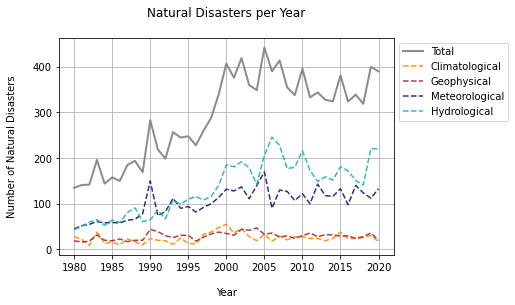

In [8]:
# single line plot

#plt.figure(figsize=(20,5))

plt.grid(axis = 'both')
plt.title("Natural Disasters per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Number of Natural Disasters\n")

plt.plot(disaster_counts_index, disaster_counts, linewidth=2, color = 'grey', alpha = 0.9, label = 'Total')
plt.plot(climatological_disaster_counts_index, climatological_disaster_counts, linestyle = '--', color = 'darkorange', alpha = 0.9, label = 'Climatological')
plt.plot(geophysical_disaster_counts_index, geophysical_disaster_counts, linestyle = '--', color = 'brown', alpha = 0.9, label = 'Geophysical')
plt.plot(meteorological_disaster_counts_index, meteorological_disaster_counts, linestyle = '--', color = 'midnightblue', alpha = 0.9, label = 'Meteorological')
plt.plot(hydrological_disaster_counts_index, hydrological_disaster_counts, linestyle = '--', color = 'lightseagreen', alpha = 0.9, label = 'Hydrological')
lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')
plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/disastersPerYearSLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

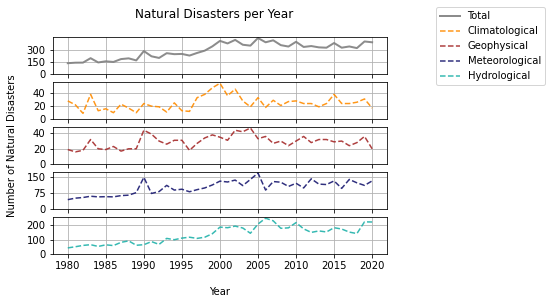

In [9]:
# multiple line plots

fig, axs = plt.subplots(5, sharex = True)
fig.suptitle("Natural Disasters per Year\n")
axs[2].set_ylabel("Number of Natural Disasters\n")
axs[4].set_xlabel("\nYear")

axs[0].plot(disaster_counts_index, disaster_counts, linewidth=2, color = 'grey', alpha = 0.9, label = 'Total')
axs[1].plot(climatological_disaster_counts_index, climatological_disaster_counts, linestyle = '--', color = 'darkorange', alpha = 0.9, label = 'Climatological')
axs[2].plot(geophysical_disaster_counts_index, geophysical_disaster_counts, linestyle = '--', color = 'brown', alpha = 0.9, label = 'Geophysical')
axs[3].plot(meteorological_disaster_counts_index, meteorological_disaster_counts, linestyle = '--', color = 'midnightblue', alpha = 0.9, label = 'Meteorological')
axs[4].plot(hydrological_disaster_counts_index, hydrological_disaster_counts, linestyle = '--', color = 'lightseagreen', alpha = 0.9, label = 'Hydrological')

plt.sca(axs[0])
plt.yticks(np.linspace(0,300,3))
plt.grid(axis = 'both')

plt.sca(axs[1])
plt.yticks(np.linspace(0,40,3))
plt.grid(axis = 'both')

plt.sca(axs[2])
plt.yticks(np.linspace(0,40,3))
plt.grid(axis = 'both')

plt.sca(axs[3])
plt.yticks(np.linspace(0,150,3))
plt.grid(axis = 'both')

plt.sca(axs[4])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'both')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')
plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/disastersPerYearMLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

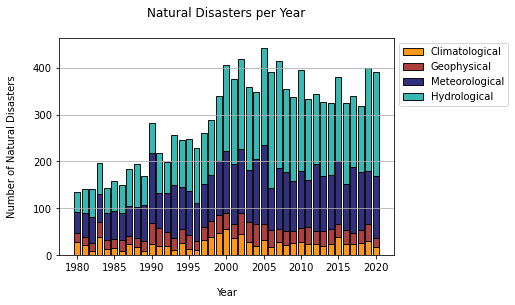

In [10]:
# single bar chart

bottom1 = climatological_disaster_counts
bottom2 = np.add(bottom1, geophysical_disaster_counts).tolist()
bottom3 = np.add(bottom2, meteorological_disaster_counts).tolist()

plt.grid(axis = 'y')

plt.title("Natural Disasters per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Number of Natural Disasters\n")

plt.bar(climatological_disaster_counts_index, climatological_disaster_counts, edgecolor = 'black', color = 'darkorange', alpha = 0.9, label = 'Climatological')
plt.bar(geophysical_disaster_counts_index, geophysical_disaster_counts, bottom = bottom1, edgecolor = 'black', color = 'brown', alpha = 0.9, label = 'Geophysical')
plt.bar(meteorological_disaster_counts_index, meteorological_disaster_counts, bottom = bottom2, edgecolor = 'black', color = 'midnightblue', alpha = 0.9, label = 'Meteorological')
plt.bar(hydrological_disaster_counts_index, hydrological_disaster_counts, bottom = bottom3, edgecolor = 'black', color = 'lightseagreen', alpha = 0.9, label = 'Hydrological')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/disastersPerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

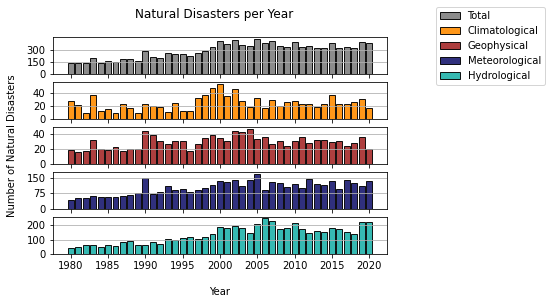

In [11]:
# multiple bar charts

fig, axs = plt.subplots(5, sharex = True)
fig.suptitle("Natural Disasters per Year\n")
axs[2].set_ylabel("Number of Natural Disasters\n")
axs[4].set_xlabel("\nYear")

axs[0].bar(disaster_counts_index, disaster_counts, edgecolor = 'black', color = 'grey', alpha = 0.9, label = 'Total')
axs[1].bar(climatological_disaster_counts_index, climatological_disaster_counts, edgecolor = 'black', color = 'darkorange', alpha = 0.9, label = 'Climatological')
axs[2].bar(geophysical_disaster_counts_index, geophysical_disaster_counts, edgecolor = 'black', color = 'brown', alpha = 0.9, label = 'Geophysical')
axs[3].bar(meteorological_disaster_counts_index, meteorological_disaster_counts, edgecolor = 'black', color = 'midnightblue', alpha = 0.9, label = 'Meteorological')
axs[4].bar(hydrological_disaster_counts_index, hydrological_disaster_counts, edgecolor = 'black', color = 'lightseagreen', alpha = 0.9, label = 'Hydrological')

plt.sca(axs[0])
plt.yticks(np.linspace(0,300,3))
plt.grid(axis = 'y')

plt.sca(axs[1])
plt.yticks(np.linspace(0,40,3))
plt.grid(axis = 'y')

plt.sca(axs[2])
plt.yticks(np.linspace(0,40,3))
plt.grid(axis = 'y')

plt.sca(axs[3])
plt.yticks(np.linspace(0,150,3))
plt.grid(axis = 'y')

plt.sca(axs[4])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'y')


lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/disastersPerYearMBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

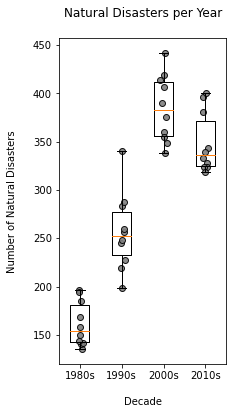

In [12]:
# BOXPLOT DISASTERS BY DECADE

total_box_data = [disaster_counts[0:10], disaster_counts[10:20], disaster_counts[20:30], disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Natural Disasters per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Number of Natural Disasters\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'grey', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'grey', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'grey', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'grey', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/disastersPerYearBOX.png", bbox_inches='tight')

# DISASTER OCCURANCES STATISTICS

In [13]:
# TOTAL NATURAL DISASTER ANALYSIS

print("TOTAL NATURAL DISASTER ANALYSIS")

# total statistical data
print("\nTotal Statistical Data: ")
print(disaster_counts.describe())

# 1980s statistical data
print("\n1980s Statistical Data: ")
print(disaster_counts[0:10].describe())

# 1990s statistical data
print("\n1990s Statistical Data: ")
print(disaster_counts[10:20].describe())

# 2000s statistical data
print("\n2000s Statistical Data: ")
print(disaster_counts[20:30].describe())

# 2010s statistical data
print("\n2010s Statistical Data: ")
print(disaster_counts[30:40].describe())

print("\n")

# total statistical changes 1980s-2010s

total_mean_1980s = disaster_counts[0:10].mean()
total_mean_2010s = disaster_counts[30:40].mean()
mean_percent_change_1980_to_2020 = 100*(total_mean_2010s-total_mean_1980s)/abs(total_mean_1980s)
print("Mean Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_1980_to_2020))

total_max_1980s = disaster_counts[0:10].max()
total_max_2010s = disaster_counts[30:40].max()
max_percent_change_1980_to_2020 = 100*(total_max_2010s-total_max_1980s)/abs(total_max_1980s)
print("Max Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_1980_to_2020))

total_min_1980s = disaster_counts[0:10].min()
total_min_2010s = disaster_counts[30:40].min()
min_percent_change_1980_to_2020 = 100*(total_min_2010s-total_min_1980s)/abs(total_min_1980s)
print("Min Disaster Change (1980s-2010s): {:.2f}%".format(min_percent_change_1980_to_2020))

total_std_1980s = disaster_counts[0:10].std()
total_std_2010s = disaster_counts[30:40].std()
std_percent_change_1980_to_2020 = 100*(total_std_2010s-total_std_1980s)/abs(total_std_1980s)
print("Standard Deviation of Disasters Change (1980s-2010s): {:.2f}%".format(std_percent_change_1980_to_2020))

TOTAL NATURAL DISASTER ANALYSIS

Total Statistical Data: 
count     41.000000
mean     290.463415
std       93.564442
min      135.000000
25%      199.000000
50%      324.000000
75%      360.000000
max      442.000000
Name: Year, dtype: float64

1980s Statistical Data: 
count     10.000000
mean     161.400000
std       23.114209
min      135.000000
25%      142.500000
50%      154.000000
75%      181.000000
max      196.000000
Name: Year, dtype: float64

1990s Statistical Data: 
count     10.000000
mean     256.700000
std       40.011248
min      199.000000
25%      232.250000
50%      252.500000
75%      277.250000
max      340.000000
Name: Year, dtype: float64

2000s Statistical Data: 
count     10.000000
mean     385.000000
std       34.746702
min      338.000000
25%      356.250000
50%      383.000000
75%      412.250000
max      442.000000
Name: Year, dtype: float64

2010s Statistical Data: 
count     10.000000
mean     348.800000
std       31.279386
min      319.000000
25%      3

# YoY CHANGE IN DISASTER OCCURANCES ANALYSIS

In [14]:
disaster_change = [disaster_counts[i+1]-disaster_counts[i] for i in range(1980,2020)]
disaster_change = pd.Series(disaster_change)
climatological_disaster_change = [climatological_disaster_counts[i+1]-climatological_disaster_counts[i] for i in range(1980,2020)]
climatological_disaster_change = pd.Series(climatological_disaster_change)
geophysical_disaster_change = [geophysical_disaster_counts[i+1]-geophysical_disaster_counts[i] for i in range(1980,2020)]
geophysical_disaster_change = pd.Series(geophysical_disaster_change)
meteorological_disaster_change = [meteorological_disaster_counts[i+1]-meteorological_disaster_counts[i] for i in range(1980,2020)]
meteorological_disaster_change = pd.Series(meteorological_disaster_change)
hydrological_disaster_change = [hydrological_disaster_counts[i+1]-hydrological_disaster_counts[i] for i in range(1980,2020)]
hydrological_disaster_change = pd.Series(hydrological_disaster_change)

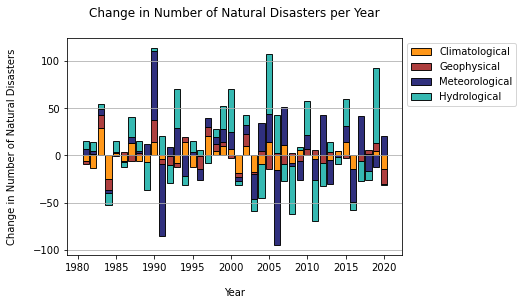

In [15]:
# single bar chart

change_data = np.array([climatological_disaster_change, geophysical_disaster_change, meteorological_disaster_change, hydrological_disaster_change])

data_shape = np.shape(change_data)

# Take negative and positive data apart and cumulate
def get_cumulated_array(change_data, **kwargs):
    cum = change_data.clip(**kwargs)
    cum = np.cumsum(cum, axis=0)
    d = np.zeros(np.shape(change_data))
    d[1:] = cum[:-1]
    return d  

cumulated_data = get_cumulated_array(change_data, min=0)
cumulated_data_neg = get_cumulated_array(change_data, max=0)

# Re-merge negative and positive data.
row_mask = (change_data<0)
cumulated_data[row_mask] = cumulated_data_neg[row_mask]
data_stack = cumulated_data

cols = ["darkorange", "brown", "midnightblue", "lightseagreen"]
labs = ["Climatological", "Geophysical", "Meteorological", "Hydrological"]

fig = plt.figure()
ax = plt.subplot(111)

for i in np.arange(0, data_shape[0]):
    ax.bar(range(1981, 2021), change_data[i], bottom=data_stack[i], edgecolor = 'black', color=cols[i], alpha = 0.9, label = labs[i])

plt.grid(axis = 'y')

plt.title("Change in Number of Natural Disasters per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Change in Number of Natural Disasters\n")

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/disasterChangePerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

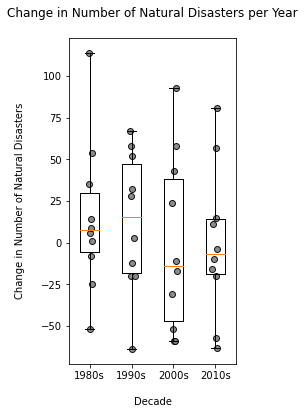

In [16]:
# YoY CHANGE IN DISASTER OCCURANCES BOXPLOT

total_box_data = [disaster_change[0:10], disaster_change[10:20], disaster_change[20:30], disaster_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Change in Number of Natural Disasters per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Change in Number of Natural Disasters\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'grey', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'grey', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'grey', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'grey', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/disasterChangePerYearBOX.png", bbox_inches='tight')

In [17]:
disaster_percent_change = [(disaster_counts[i+1]-disaster_counts[i])/disaster_counts[i] for i in range(1980,2020)]
disaster_percent_change = pd.Series(disaster_percent_change)

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


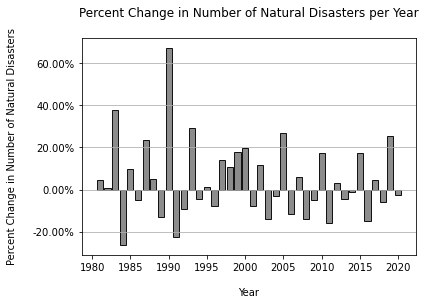

In [18]:
# single bar chart

fig, ax = plt.subplots(1)

plt.grid(axis = 'y')

plt.title("Percent Change in Number of Natural Disasters per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Percent Change in Number of Natural Disasters\n")

plt.bar(range(1981, 2021), disaster_percent_change, edgecolor = 'black', color = 'grey', alpha = 0.9)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/disasterPercentChangePerYearSBC.png", bbox_inches='tight')

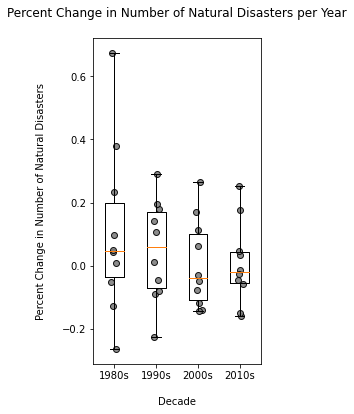

In [19]:
# YoY CHANGE IN DISASTER OCCURANCES BOXPLOT

total_box_data = [disaster_percent_change[0:10], disaster_percent_change[10:20], disaster_percent_change[20:30], disaster_percent_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Percent Change in Number of Natural Disasters per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Percent Change in Number of Natural Disasters\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'grey', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'grey', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'grey', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'grey', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/disasterPercentChangePerYearBOX.png", bbox_inches='tight')

# YoY CHANGE IN DISASTER OCCURANCES STATISTICS

In [20]:
# CHANGE IN NUMBER OF NATURAL DISASTERS ANALYSIS

print("CHANGE IN NUMBER OF NATURAL DISASTERS ANALYSIS")

# total statistical data
print("\nTotal Statistical Data on Yearly Change in Number of Disasters: ")
print(disaster_change.describe())

# 1980s statistical data
print("\n1980s Statistical Data on Yearly Change in Number of Disasters: ")
print(disaster_change[0:10].describe())

# 1990s statistical data
print("\n1990s Statistical Data on Yearly Change in Number of Disasters: ")
print(disaster_change[10:20].describe())

# 2000s statistical data
print("\n2000s Statistical Data on Yearly Change in Number of Disasters: ")
print(disaster_change[20:30].describe())

# 2010s statistical data
print("\n2010s Statistical Data on Yearly Change in Number of Disasters: ")
print(disaster_change[30:40].describe())

print("\n")

# total statistical changes 1980s-2010s

total_mean_1980s = disaster_change[0:10].mean()
total_mean_2010s = disaster_change[30:40].mean()
mean_percent_change_1980_to_2020 = 100*(total_mean_2010s-total_mean_1980s)/abs(total_mean_1980s)
print("Percent Change of Mean Disaster Occurance Yearly Change (1980s-2010s): {:.2f}%".format(mean_percent_change_1980_to_2020))

total_max_1980s = disaster_change[0:10].max()
total_max_2010s = disaster_change[30:40].max()
max_percent_change_1980_to_2020 = 100*(total_max_2010s-total_max_1980s)/abs(total_max_1980s)
print("Percent Change of Min Disaster Occurance Yearly Change (1980s-2010s): {:.2f}%".format(max_percent_change_1980_to_2020))

total_min_1980s = disaster_change[0:10].min()
total_min_2010s = disaster_change[30:40].min()
min_percent_change_1980_to_2020 = 100*(total_min_2010s-total_min_1980s)/abs(total_min_1980s)
print("Percent Change of Max Disaster Occurance Yearly Change (1980s-2010s): {:.2f}%".format(min_percent_change_1980_to_2020))

total_std_1980s = disaster_change[0:10].std()
total_std_2010s = disaster_change[30:40].std()
std_percent_change_1980_to_2020 = 100*(total_std_2010s-total_std_1980s)/abs(total_std_1980s)
print("Percent Change of Standard Deviation Disaster Occurance Yearly Change (1980s-2010s): {:.2f}%".format(std_percent_change_1980_to_2020))

CHANGE IN NUMBER OF NATURAL DISASTERS ANALYSIS

Total Statistical Data on Yearly Change in Number of Disasters: 
count     40.000000
mean       6.375000
std       45.362747
min      -64.000000
25%      -20.000000
50%        2.000000
75%       37.000000
max      114.000000
dtype: float64

1980s Statistical Data on Yearly Change in Number of Disasters: 
count     10.000000
mean      14.800000
std       45.526061
min      -52.000000
25%       -5.750000
50%        7.500000
75%       29.750000
max      114.000000
dtype: float64

1990s Statistical Data on Yearly Change in Number of Disasters: 
count    10.000000
mean     12.400000
std      42.000529
min     -64.000000
25%     -18.000000
50%      15.500000
75%      47.000000
max      67.000000
dtype: float64

2000s Statistical Data on Yearly Change in Number of Disasters: 
count    10.000000
mean     -1.100000
std      53.190329
min     -59.000000
25%     -46.750000
50%     -14.000000
75%      38.250000
max      93.000000
dtype: float64

2010

In [21]:
# CHANGE IN NUMBER OF NATURAL DISASTERS ANALYSIS

print("CHANGE IN NUMBER OF NATURAL DISASTERS ANALYSIS")

# total statistical data
print("\nTotal Statistical Data on Yearly Percent Change in Number of Disasters: ")
print(disaster_percent_change.describe())

# 1980s statistical data
print("\n1980s Statistical Data on Yearly Percent Change in Number of Disasters: ")
print(disaster_percent_change[0:10].describe())

# 1990s statistical data
print("\n1990s Statistical Data on Yearly Percent Change in Number of Disasters: ")
print(disaster_percent_change[10:20].describe())

# 2000s statistical data
print("\n2000s Statistical Data on Yearly Percent Change in Number of Disasters: ")
print(disaster_percent_change[20:30].describe())

# 2010s statistical data
print("\n2010s Statistical Data on Yearly Percent Change in Number of Disasters: ")
print(disaster_percent_change[30:40].describe())

print("\n")

# total statistical changes 1980s-2010s

total_mean_1980s = disaster_percent_change[0:10].mean()
total_mean_2010s = disaster_percent_change[30:40].mean()
mean_percent_change_1980_to_2020 = 100*(total_mean_2010s-total_mean_1980s)/abs(total_mean_1980s)
print("Percent Change of Mean Disaster Occurance Yearly Percent Change (1980s-2010s): {:.2f}%".format(mean_percent_change_1980_to_2020))

total_max_1980s = disaster_percent_change[0:10].max()
total_max_2010s = disaster_percent_change[30:40].max()
max_percent_change_1980_to_2020 = 100*(total_max_2010s-total_max_1980s)/abs(total_max_1980s)
print("Percent Change of Min Disaster Occurance Yearly Percent Change (1980s-2010s): {:.2f}%".format(max_percent_change_1980_to_2020))

total_min_1980s = disaster_percent_change[0:10].min()
total_min_2010s = disaster_percent_change[30:40].min()
min_percent_change_1980_to_2020 = 100*(total_min_2010s-total_min_1980s)/abs(total_min_1980s)
print("Percent Change of Max Disaster Occurance Yearly Percent Change (1980s-2010s): {:.2f}%".format(min_percent_change_1980_to_2020))

total_std_1980s = disaster_percent_change[0:10].std()
total_std_2010s = disaster_percent_change[30:40].std()
std_percent_change_1980_to_2020 = 100*(total_std_2010s-total_std_1980s)/abs(total_std_1980s)
print("Percent Change of Standard Deviation Disaster Occurance Yearly Percent Change (1980s-2010s): {:.2f}%".format(std_percent_change_1980_to_2020))

CHANGE IN NUMBER OF NATURAL DISASTERS ANALYSIS

Total Statistical Data on Yearly Percent Change in Number of Disasters: 
count    40.000000
mean      0.041037
std       0.181109
min      -0.265306
25%      -0.077287
50%       0.009669
75%       0.148163
max       0.674556
dtype: float64

1980s Statistical Data on Yearly Percent Change in Number of Disasters: 
count    10.000000
mean      0.104077
std       0.268569
min      -0.265306
25%      -0.036202
50%       0.046547
75%       0.199306
max       0.674556
dtype: float64

1990s Statistical Data on Yearly Percent Change in Number of Disasters: 
count    10.000000
mean      0.048455
std       0.160732
min      -0.226148
25%      -0.072157
50%       0.059969
75%       0.170504
max       0.291457
dtype: float64

2000s Statistical Data on Yearly Percent Change in Number of Disasters: 
count    10.000000
mean      0.005839
std       0.141416
min      -0.142512
25%      -0.107277
50%      -0.039221
75%       0.101156
max       0.266476
dtyp

# DISASTER COSTS ANALYSIS

In [22]:
disaster_costs = data[['Year', 'Total Damages']]
disaster_costs = disaster_costs.groupby('Year').sum()
disaster_costs = disaster_costs.squeeze()

climatological_costs = climatological_data[['Year', 'Total Damages']]
climatological_costs = climatological_costs.groupby('Year').sum()
climatological_costs = climatological_costs.squeeze()

geophysical_costs = geophysical_data[['Year', 'Total Damages']]
geophysical_costs = geophysical_costs.groupby('Year').sum()
geophysical_costs = geophysical_costs.squeeze()

meteorological_costs = meteorological_data[['Year', 'Total Damages']]
meteorological_costs = meteorological_costs.groupby('Year').sum().groupby('Year').sum()
meteorological_costs = meteorological_costs.squeeze()

hydrological_costs = hydrological_data[['Year', 'Total Damages']]
hydrological_costs = hydrological_costs.groupby('Year').sum()
hydrological_costs = hydrological_costs.squeeze()

In [23]:
japan_tsunami_2011_cost = 2.408585e+02
hurricane_harvey_2017_cost = 9.998350e+01
sichuan_earthquake_2008_cost = 1.018695e+02
hurricane_katrina_2005_cost = 1.651464e+02
izmit_earthquake_1999_cost = 3.097570e+01
kobe_earthquake_1995_cost = 1.692989e+02
irpinia_earthquake_1980_cost = 6.266630e+01

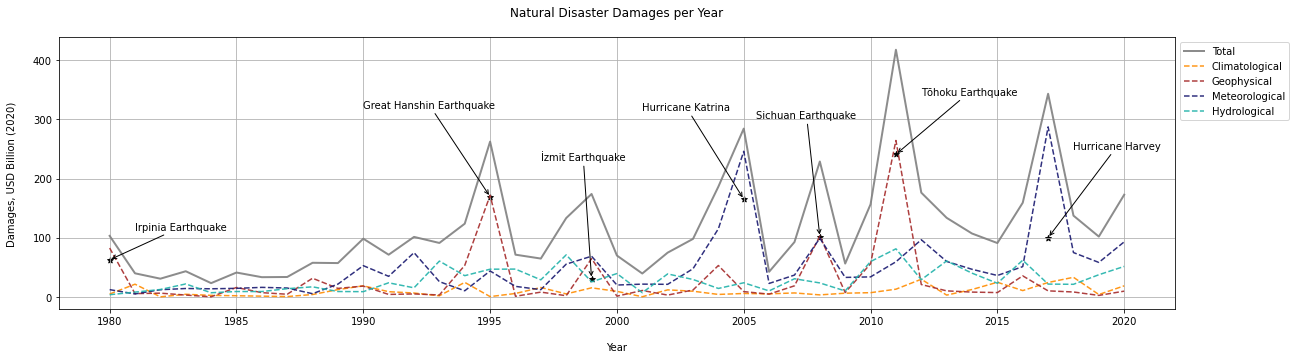

In [24]:
# single line plot

plt.figure(figsize=(20,5))

plt.grid(axis = 'both')
plt.title("Natural Disaster Damages per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Damages, USD Billion (2020)\n")

plt.plot(disaster_costs.index, disaster_costs, linewidth=2, color = 'grey', alpha = 0.9, label = 'Total')
plt.plot(climatological_costs.index, climatological_costs, linestyle = '--', color = 'darkorange', alpha = 0.9, label = 'Climatological')
plt.plot(geophysical_costs.index, geophysical_costs, linestyle = '--', alpha = 0.9, color = 'brown', label = 'Geophysical')
plt.plot(meteorological_costs.index, meteorological_costs, linestyle = '--', alpha = 0.9, color = 'midnightblue', label = 'Meteorological')
plt.plot(hydrological_costs.index, hydrological_costs, linestyle = '--', alpha = 0.9, color = 'lightseagreen', label = 'Hydrological')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.scatter([1980, 1995, 1999, 2005, 2008, 2011, 2017], [irpinia_earthquake_1980_cost, kobe_earthquake_1995_cost,izmit_earthquake_1999_cost,hurricane_katrina_2005_cost,sichuan_earthquake_2008_cost,japan_tsunami_2011_cost, hurricane_harvey_2017_cost], c='black', marker = "*")

plt.annotate("Irpinia Earthquake",
            xy=(1980, irpinia_earthquake_1980_cost), xycoords='data',
            xytext=(1980+1, irpinia_earthquake_1980_cost+50), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.annotate("Great Hanshin Earthquake",
            xy=(1995, kobe_earthquake_1995_cost), xycoords='data',
            xytext=(1995-5, kobe_earthquake_1995_cost+150), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.annotate("İzmit Earthquake",
            xy=(1999, izmit_earthquake_1999_cost), xycoords='data',
            xytext=(1999-2, izmit_earthquake_1999_cost+200), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.annotate("Hurricane Katrina",
            xy=(2005, hurricane_katrina_2005_cost), xycoords='data',
            xytext=(2005-4, hurricane_katrina_2005_cost+150), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.annotate("Sichuan Earthquake",
            xy=(2008, sichuan_earthquake_2008_cost), xycoords='data',
            xytext=(2008-2.5, sichuan_earthquake_2008_cost+200), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.annotate("Tōhoku Earthquake",
            xy=(2011, japan_tsunami_2011_cost), xycoords='data',
            xytext=(2011+1, japan_tsunami_2011_cost+100), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.annotate("Hurricane Harvey",
            xy=(2017, hurricane_harvey_2017_cost), xycoords='data',
            xytext=(2017+1, hurricane_harvey_2017_cost+150), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/disasterCostsPerYearSLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

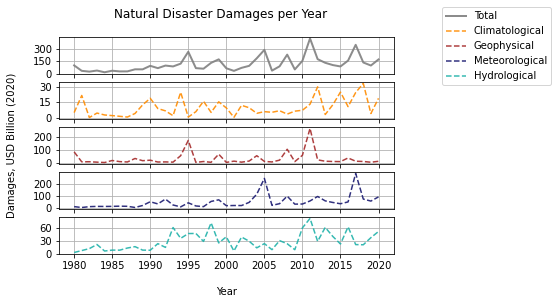

In [25]:
# multiple line plots

fig, axs = plt.subplots(5, sharex = True)
fig.suptitle("Natural Disaster Damages per Year\n")
axs[2].set_ylabel("Damages, USD Billion (2020)\n")
axs[4].set_xlabel("\nYear")

axs[0].plot(disaster_costs.index, disaster_costs, linewidth=2, color = 'grey', alpha = 0.9, label = 'Total')
axs[1].plot(climatological_costs.index, climatological_costs, linestyle = '--', color = 'darkorange', alpha = 0.9, label = 'Climatological')
axs[2].plot(geophysical_costs.index, geophysical_costs, linestyle = '--', color = 'brown', alpha = 0.9, label = 'Geophysical')
axs[3].plot(meteorological_costs.index, meteorological_costs, linestyle = '--', color = 'midnightblue', alpha = 0.9, label = 'Meteorological')
axs[4].plot(hydrological_costs.index, hydrological_costs, linestyle = '--', color = 'lightseagreen', alpha = 0.9, label = 'Hydrological')

plt.sca(axs[0])
plt.yticks(np.linspace(0,300,3))
plt.grid(axis = 'both')

plt.sca(axs[1])
plt.yticks(np.linspace(0,30,3))
plt.grid(axis = 'both')

plt.sca(axs[2])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'both')

plt.sca(axs[3])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'both')

plt.sca(axs[4])
plt.yticks(np.linspace(0,60,3))
plt.grid(axis = 'both')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/disasterCostsPerYearMLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

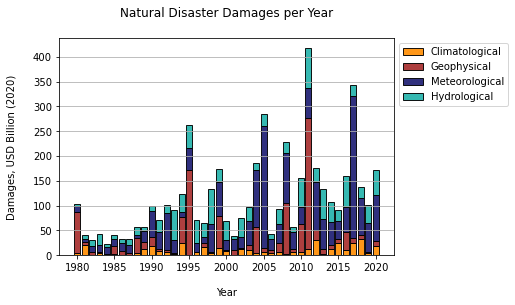

In [26]:
# single bar chart

bottom1 = climatological_costs
bottom2 = np.add(bottom1, geophysical_costs).tolist()
bottom3 = np.add(bottom2, meteorological_costs).tolist()

plt.grid(axis = 'y')
plt.title("Natural Disaster Damages per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Damages, USD Billion (2020)\n")

plt.bar(climatological_costs.index, climatological_costs, edgecolor='black', color = 'darkorange', alpha = 0.9, label = "Climatological")
plt.bar(geophysical_costs.index, geophysical_costs, bottom = bottom1, edgecolor='black', color = 'brown', alpha = 0.9, label = "Geophysical")
plt.bar(meteorological_costs.index, meteorological_costs, bottom = bottom2, edgecolor='black', color = 'midnightblue', alpha = 0.9, label = "Meteorological")
plt.bar(hydrological_costs.index, hydrological_costs, bottom = bottom3, edgecolor='black', color = 'lightseagreen', alpha = 0.9, label = "Hydrological")

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/disasterCostsPerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

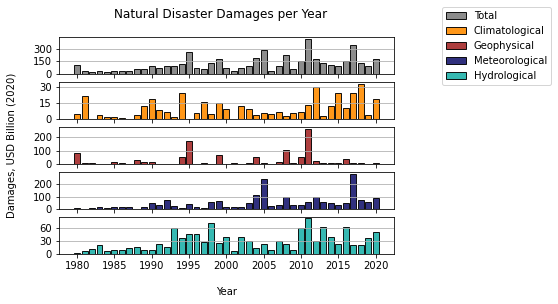

In [27]:
# multiple bar charts

fig, axs = plt.subplots(5, sharex = True)
fig.suptitle("Natural Disaster Damages per Year\n")
axs[2].set_ylabel("Damages, USD Billion (2020)\n")
axs[4].set_xlabel("\nYear")

axs[0].bar(disaster_costs.index, disaster_costs, color = 'grey', alpha = 0.9, edgecolor = 'black', label = 'Total')
axs[1].bar(climatological_costs.index, climatological_costs, color = 'darkorange', alpha = 0.9, edgecolor = 'black', label = 'Climatological')
axs[2].bar(geophysical_costs.index, geophysical_costs, color = 'brown', alpha = 0.9, edgecolor = 'black', label = 'Geophysical')
axs[3].bar(meteorological_costs.index, meteorological_costs, color = 'midnightblue', alpha = 0.9, edgecolor = 'black', label = 'Meteorological')
axs[4].bar(hydrological_costs.index, hydrological_costs, color = 'lightseagreen', alpha = 0.9, edgecolor = 'black', label = 'Hydrological')

plt.sca(axs[0])
plt.yticks(np.linspace(0,300,3))
plt.grid(axis = 'y')

plt.sca(axs[1])
plt.yticks(np.linspace(0,30,3))
plt.grid(axis = 'y')

plt.sca(axs[2])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'y')

plt.sca(axs[3])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'y')

plt.sca(axs[4])
plt.yticks(np.linspace(0,60,3))
plt.grid(axis = 'y')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/disasterCostsPerYearMBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

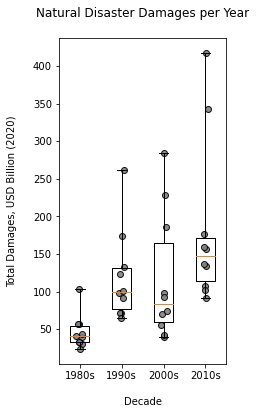

In [28]:
# BOXPLOT TOTAL DAMAGES BY DECADE

total_box_cost_data = [disaster_costs[0:10], disaster_costs[10:20], disaster_costs[20:30], disaster_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Natural Disaster Damages per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Total Damages, USD Billion (2020)\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_cost_data[0], color = 'grey', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'grey', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'grey', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'grey', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/disasterCostsPerYearBOX.png", bbox_inches='tight')


# DISASTER COSTS STATISTICS

In [29]:
# TOTAL NATURAL DISASTER COST ANALYSIS

print("TOTAL NATURAL DISASTER COST ANALYSIS")

# total costs statistical data
print("\nTotal Costs Statistical Data: ")
print(disaster_costs.describe())

# 1980s costs statistical data
print("\n1980s Costs Statistical Data: ")
print(disaster_costs[0:10].describe())

# 1990s costs statistical data
print("\n1990s Costs Statistical Data: ")
print(disaster_costs[10:20].describe())

# 2000s costs statistical data
print("\n2000s Costs Statistical Data: ")
print(disaster_costs[20:30].describe())

# 2010s costs statistical data
print("\n2010s Costs Statistical Data: ")
print(disaster_costs[30:40].describe())

print("\n")

# total costs statistical changes 1980s-2010s
total_mean_costs_1980s = disaster_costs[0:10].mean()
total_mean_costs_2010s = disaster_costs[30:40].mean()
mean_costs_percent_change_1980_to_2020 = 100*(total_mean_costs_2010s-total_mean_costs_1980s)/abs(total_mean_costs_1980s)
print("Mean Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_1980_to_2020))

total_max_costs_1980s = disaster_costs[0:10].max()
total_max_costs_2010s = disaster_costs[30:40].max()
max_costs_percent_change_1980_to_2020 = 100*(total_max_costs_2010s-total_max_costs_1980s)/abs(total_max_costs_1980s)
print("Max Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_1980_to_2020))

total_min_costs_1980s = disaster_costs[0:10].min()
total_min_costs_2010s = disaster_costs[30:40].min()
min_costs_percent_change_1980_to_2020 = 100*(total_min_costs_2010s-total_min_costs_1980s)/abs(total_min_costs_1980s)
print("Min Disaster Costs Change (1980s-2010s): {:.2f}%".format(min_costs_percent_change_1980_to_2020))

total_std_costs_1980s = disaster_costs[0:10].std()
total_std_costs_2010s = disaster_costs[30:40].std()
std_costs_percent_change_1980_to_2020 = 100*(total_std_costs_2010s-total_std_costs_1980s)/abs(total_std_costs_1980s)
print("Standard Deviation of Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_1980_to_2020))

TOTAL NATURAL DISASTER COST ANALYSIS

Total Costs Statistical Data: 
count     41.000000
mean     117.590434
std       87.493362
min       23.166825
25%       57.083580
50%       97.940144
75%      156.394215
max      417.597259
Name: Total Damages, dtype: float64

1980s Costs Statistical Data: 
count     10.000000
mean      46.244717
std       22.743595
min       23.166825
25%       33.310139
50%       40.422289
75%       53.629089
max      103.053508
Name: Total Damages, dtype: float64

1990s Costs Statistical Data: 
count     10.000000
mean     119.085427
std       60.381245
min       64.701929
25%       76.215616
50%       99.809698
75%      130.768059
max      262.357447
Name: Total Damages, dtype: float64

2000s Costs Statistical Data: 
count     10.000000
mean     117.242352
std       85.329592
min       39.446203
25%       59.636917
50%       83.648336
75%      164.193192
max      284.323077
Name: Total Damages, dtype: float64

2010s Costs Statistical Data: 
count     10.000000

# YoY CHANGE IN DISASTER COSTS ANALYSIS

In [30]:
disaster_costs_change = [disaster_costs[i+1]-disaster_costs[i] for i in range(1980,2020)]
disaster_costs_change = pd.Series(disaster_costs_change)
climatological_costs_change = [climatological_costs[i+1]-climatological_costs[i] for i in range(1980,2020)]
climatological_costs_change = pd.Series(climatological_costs_change)
geophysical_costs_change = [geophysical_costs[i+1]-geophysical_costs[i] for i in range(1980,2020)]
geophysical_costs_change = pd.Series(geophysical_costs_change)
meteorological_costs_change = [meteorological_costs[i+1]-meteorological_costs[i] for i in range(1980,2020)]
meteorological_costs_change = pd.Series(meteorological_costs_change)
hydrological_costs_change = [hydrological_costs[i+1]-hydrological_costs[i] for i in range(1980,2020)]
hydrological_costs_change = pd.Series(hydrological_costs_change)

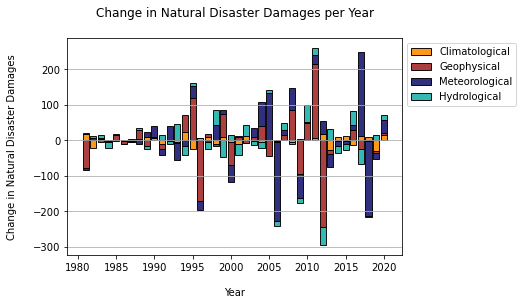

In [31]:
# single bar chart

costs_change_data = np.array([climatological_costs_change, geophysical_costs_change, meteorological_costs_change, hydrological_costs_change])

data_shape = np.shape(costs_change_data)

# Take negative and positive data apart and cumulate
def get_cumulated_array(costs_change_data, **kwargs):
    cum = costs_change_data.clip(**kwargs)
    cum = np.cumsum(cum, axis=0)
    d = np.zeros(np.shape(costs_change_data))
    d[1:] = cum[:-1]
    return d  

cumulated_data = get_cumulated_array(costs_change_data, min=0)
cumulated_data_neg = get_cumulated_array(costs_change_data, max=0)

# Re-merge negative and positive data.
row_mask = (costs_change_data<0)
cumulated_data[row_mask] = cumulated_data_neg[row_mask]
data_stack = cumulated_data

cols = ["darkorange", "brown", "midnightblue", "lightseagreen"]
labs = ["Climatological", "Geophysical", "Meteorological", "Hydrological"]

#fig = plt.figure(figsize=(5,20))
ax = plt.subplot(111)

for i in np.arange(0, data_shape[0]):
    ax.bar(range(1981, 2021), costs_change_data[i], bottom=data_stack[i], edgecolor = 'black', color=cols[i], alpha = 0.9, label = labs[i])

plt.grid(axis = 'y')

plt.title("Change in Natural Disaster Damages per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Change in Natural Disaster Damages\n")

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/disasterCostsChangePerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

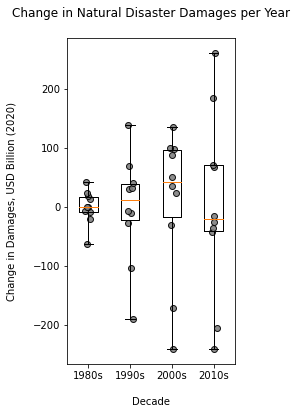

In [32]:
# YoY CHANGE IN DISASTER OCCURANCES BOXPLOT

total_box_cost_data = [disaster_costs_change[0:10], disaster_costs_change[10:20], disaster_costs_change[20:30], disaster_costs_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Change in Natural Disaster Damages per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Change in Damages, USD Billion (2020)\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_cost_data[0], color = 'grey', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'grey', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'grey', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'grey', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/disasterCostsChangePerYearBOX.png", bbox_inches='tight')


In [33]:
disaster_costs_percent_change = [(disaster_costs[i+1]-disaster_costs[i])/disaster_costs[i] for i in range(1980,2020)]
disaster_costs_percent_change = pd.Series(disaster_costs_percent_change)

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


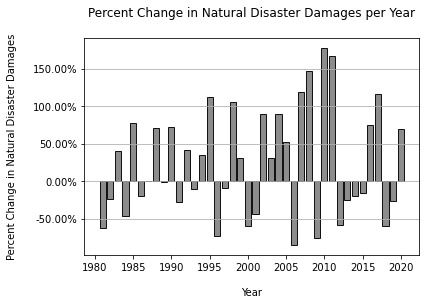

In [34]:
# single bar chart

fig, ax = plt.subplots(1)

plt.grid(axis = 'y')

plt.title("Percent Change in Natural Disaster Damages per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Percent Change in Natural Disaster Damages\n")

plt.bar(range(1981, 2021), disaster_costs_percent_change, edgecolor = 'black', color = 'grey', alpha = 0.9)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/disasterCostsPercentChangePerYearSBC.png", bbox_inches='tight')

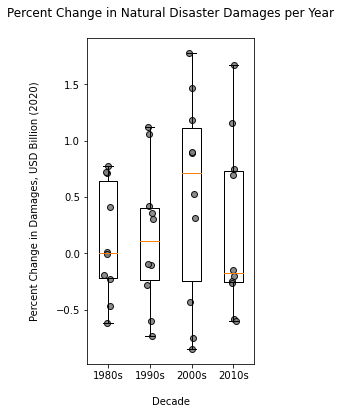

In [35]:
# YoY CHANGE IN DISASTER OCCURANCES BOXPLOT

total_box_cost_data = [disaster_costs_percent_change[0:10], disaster_costs_percent_change[10:20], disaster_costs_percent_change[20:30], disaster_costs_percent_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Percent Change in Natural Disaster Damages per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Percent Change in Damages, USD Billion (2020)\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_cost_data[0], color = 'grey', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'grey', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'grey', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'grey', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/disasterCostsPercentChangePerYearBOX.png", bbox_inches='tight')


# YoY CHANGE IN DISASTER COSTS STATISTICS

In [36]:
# CHANGE IN NATURAL DISASTER COSTS ANALYSIS

print("CHANGE IN NATURAL DISASTER COSTS ANALYSIS")

# total statistical data
print("\nTotal Statistical Data on Yearly Change in Disaster Costs: ")
print(disaster_costs_change.describe())

# 1980s statistical data
print("\n1980s Statistical Data on Yearly Change in Disaster Costs: ")
print(disaster_costs_change[0:10].describe())

# 1990s statistical data
print("\n1990s Statistical Data on Yearly Change in Disaster Costs: ")
print(disaster_costs_change[10:20].describe())

# 2000s statistical data
print("\n2000s Statistical Data on Yearly Change in Disaster Costs: ")
print(disaster_costs_change[20:30].describe())

# 2010s statistical data
print("\n2010s Statistical Data on Yearly Change in Disaster Costs: ")
print(disaster_costs_change[30:40].describe())

print("\n")

# total statistical changes 1980s-2010s

total_mean_1980s = disaster_costs_change[0:10].mean()
total_mean_2010s = disaster_costs_change[30:40].mean()
mean_percent_change_1980_to_2020 = 100*(total_mean_2010s-total_mean_1980s)/abs(total_mean_1980s)
print("Percent Change of Mean Disaster Costs Yearly Change (1980s-2010s): {:.2f}%".format(mean_percent_change_1980_to_2020))

total_max_1980s = disaster_costs_change[0:10].max()
total_max_2010s = disaster_costs_change[30:40].max()
max_percent_change_1980_to_2020 = 100*(total_max_2010s-total_max_1980s)/abs(total_max_1980s)
print("Percent Change of Min Disaster Costs Yearly Change (1980s-2010s): {:.2f}%".format(max_percent_change_1980_to_2020))

total_min_1980s = disaster_costs_change[0:10].min()
total_min_2010s = disaster_costs_change[30:40].min()
min_percent_change_1980_to_2020 = 100*(total_min_2010s-total_min_1980s)/abs(total_min_1980s)
print("Percent Change of Max Disaster Costs Yearly Change (1980s-2010s): {:.2f}%".format(min_percent_change_1980_to_2020))

total_std_1980s = disaster_costs_change[0:10].std()
total_std_2010s = disaster_costs_change[30:40].std()
std_percent_change_1980_to_2020 = 100*(total_std_2010s-total_std_1980s)/abs(total_std_1980s)
print("Percent Change of Standard Deviation Disaster Costs Yearly Change (1980s-2010s): {:.2f}%".format(std_percent_change_1980_to_2020))

CHANGE IN NATURAL DISASTER COSTS ANALYSIS

Total Statistical Data on Yearly Change in Disaster Costs: 
count     40.000000
mean       1.738070
std      106.096156
min     -241.956514
25%      -27.912905
50%        6.452534
75%       54.711372
max      261.203044
dtype: float64

1980s Statistical Data on Yearly Change in Disaster Costs: 
count    10.000000
mean     -0.473971
std      28.492806
min     -63.286144
25%      -8.772535
50%      -0.076427
75%      16.577478
max      41.230219
dtype: float64

1990s Statistical Data on Yearly Change in Disaster Costs: 
count     10.000000
mean      -2.851670
std       91.709493
min     -191.092132
25%      -22.884949
50%       11.764325
75%       38.669833
max      138.722662
dtype: float64

2000s Statistical Data on Yearly Change in Disaster Costs: 
count     10.000000
mean       8.659711
std      124.160816
min     -241.956514
25%      -16.951328
50%       42.741952
75%       95.618501
max      136.122115
dtype: float64

2010s Statistical Dat

In [37]:
# CHANGE IN NATURAL DISASTER COSTS ANALYSIS

print("CHANGE IN NATURAL DISASTER COSTS ANALYSIS")

# total statistical data
print("\nTotal Statistical Data on Yearly Percent Change in Disaster Costs: ")
print(disaster_costs_percent_change.describe())

# 1980s statistical data
print("\n1980s Statistical Data on Yearly Percent Change in Disaster Costs: ")
print(disaster_costs_percent_change[0:10].describe())

# 1990s statistical data
print("\n1990s Statistical Data on Yearly Percent Change in Disaster Costs: ")
print(disaster_costs_percent_change[10:20].describe())

# 2000s statistical data
print("\n2000s Statistical Data on Yearly Percent Change in Disaster Costs: ")
print(disaster_costs_percent_change[20:30].describe())

# 2010s statistical data
print("\n2010s Statistical Data on Yearly Percent Change in Disaster Costs: ")
print(disaster_costs_percent_change[30:40].describe())

print("\n")

# total statistical changes 1980s-2010s

total_mean_1980s = disaster_costs_percent_change[0:10].mean()
total_mean_2010s = disaster_costs_percent_change[30:40].mean()
mean_percent_change_1980_to_2020 = 100*(total_mean_2010s-total_mean_1980s)/abs(total_mean_1980s)
print("Percent Change of Mean Disaster Costs Yearly Percent Change (1980s-2010s): {:.2f}%".format(mean_percent_change_1980_to_2020))

total_max_1980s = disaster_costs_percent_change[0:10].max()
total_max_2010s = disaster_costs_percent_change[30:40].max()
max_percent_change_1980_to_2020 = 100*(total_max_2010s-total_max_1980s)/abs(total_max_1980s)
print("Percent Change of Min Disaster Costs Yearly Percent Change (1980s-2010s): {:.2f}%".format(max_percent_change_1980_to_2020))

total_min_1980s = disaster_costs_percent_change[0:10].min()
total_min_2010s = disaster_costs_percent_change[30:40].min()
min_percent_change_1980_to_2020 = 100*(total_min_2010s-total_min_1980s)/abs(total_min_1980s)
print("Percent Change of Max Disaster Costs Yearly Percent Change (1980s-2010s): {:.2f}%".format(min_percent_change_1980_to_2020))

total_std_1980s = disaster_costs_percent_change[0:10].std()
total_std_2010s = disaster_costs_percent_change[30:40].std()
std_percent_change_1980_to_2020 = 100*(total_std_2010s-total_std_1980s)/abs(total_std_1980s)
print("Percent Change of Standard Deviation Disaster Costs Yearly Percent Change (1980s-2010s): {:.2f}%".format(std_percent_change_1980_to_2020))

CHANGE IN NATURAL DISASTER COSTS ANALYSIS

Total Statistical Data on Yearly Percent Change in Disaster Costs: 
count    40.000000
mean      0.246700
std       0.717304
min      -0.850991
25%      -0.262303
50%       0.157764
75%       0.755264
max       1.780332
dtype: float64

1980s Statistical Data on Yearly Percent Change in Disaster Costs: 
count    10.000000
mean      0.112420
std       0.511498
min      -0.614110
25%      -0.219023
50%       0.000748
75%       0.639087
max       0.773105
dtype: float64

1990s Statistical Data on Yearly Percent Change in Disaster Costs: 
count    10.000000
mean      0.147006
std       0.627624
min      -0.728366
25%      -0.232006
50%       0.106805
75%       0.406328
max       1.122036
dtype: float64

2000s Statistical Data on Yearly Percent Change in Disaster Costs: 
count    10.000000
mean      0.502921
std       0.923448
min      -0.850991
25%      -0.248323
50%       0.709938
75%       1.114822
max       1.780332
dtype: float64

2010s Statist